In [1]:
import LCMGP
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt

 /home/sudhanshu/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.


In [8]:
import LCMGP
from sklearn import metrics
import GPy
import numpy as np
from matplotlib import pyplot as plt

## Steps:
IN this experiment we test the effect of reducing inducing points on classification accuracy and other scores
- Data used is from synthetic control data set 
- It has both upward slope as well as increasing trend, however here we are testing only on it's capability to learn increasing trend
- Since clustering can be spurious we try to control for that by running each experiment 25 times and then report their averages and variances 

In [1]:
import pickle
f = open("Y_train.pickle","rb")
YBar = (pickle.load(f))
f.close()
f = open("L_train.pickle","rb")
L = (pickle.load(f))
f.close()
f = open("Y_test.pickle","rb")
Y_test = (pickle.load(f))
f.close()
f = open("L_test.pickle","rb")
L_test = (pickle.load(f))
f.close()

This is from synthetic control data set, Even though it has upward slope as well as increasing trend we firsttry to learn only increasing trend

        

### testing Infra:

## Testing the effect of inducing points on classification accuracy

### 1. IN this data, C=1; P=3

In [9]:
inds  = reversed([0.2,0.3,0.5,0.7,0.8])
accuracies = {}
f1Scores = {}
f1ScoresV = {}
accuraciesV = {}
TRreconstruction ={}
TTreconstruction ={}
TRreconstructionV ={}
TTreconstructionV ={}
faultyModel = {}
#Generae Data
#Generate Latent
for ind in inds:
    f1=[]
    accu=[]
    recTr = []
    recTt = []
    print "\n---\n ind:",ind
    for times in range(25):
        print times,
        # fit the model
        lcgm = LCMGP.LCMGP()
        lcgm.fit(Y=YBar,L=L,N=60,induction=ind,iterations=150)
        # calcualte reconstruction error for training
        recTr.append(reconstructionError(YBar=YBar,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=lcgm.uExpBar))
        # predict for test
        predictions,Expresults, ux = lcgm.predict(Y_test)
        # calcualte reconstruction error for training
        recTt.append(reconstructionError(YBar=Y_test,phiHatExpBar=lcgm.phiHatExpBar,uExpBar=ux))
        #print "Result:",np.unique(predictions,return_counts=True),np.unique(L_test,return_counts=True)
        f1s = metrics.f1_score(y_pred=predictions,y_true=L_test)
        f1.append(f1s)
        if f1s < 0.30:
            faultyModel[ind] = lcgm
        accu.append(metrics.accuracy_score(y_pred=predictions,y_true=L_test))
        
    #print f1,"\n",accu,f1,recTr
    f1Scores[ind] = np.mean(f1)
    accuracies[ind] = np.mean(accu)
    f1ScoresV[ind] = np.std(f1)
    accuraciesV[ind] = np.std(accu)
    TRreconstruction[ind] = np.mean(recTr)
    TTreconstruction[ind] =np.mean(recTt)
    TRreconstructionV[ind] = np.std(recTr)
    TTreconstructionV[ind] =np.std(recTt)
#plt.plot(induction,results)


---
 ind: 0.8
0 Model initialized with  0.8 induction ratio
150 updates
1 Model initialized with  0.8 induction ratio
150 updates
2 Model initialized with  0.8 induction ratio
150 updates
3 Model initialized with  0.8 induction ratio
150 updates
4 Model initialized with  0.8 induction ratio
150 updates
5 Model initialized with  0.8 induction ratio
150 updates
6 Model initialized with  0.8 induction ratio
150 updates
7 Model initialized with  0.8 induction ratio
150 updates
8 Model initialized with  0.8 induction ratio
150 updates
9 Model initialized with  0.8 induction ratio
150 updates
10 Model initialized with  0.8 induction ratio
150 updates
11 Model initialized with  0.8 induction ratio
150 updates
12 Model initialized with  0.8 induction ratio
150 updates
13 Model initialized with  0.8 induction ratio
150 updates
14 Model initialized with  0.8 induction ratio
150 updates
15 Model initialized with  0.8 induction ratio
150 updates
16 Model initialized with  0.8 induction ratio
150 

In [6]:
%matplotlib inline
import numpy as np
def reconstructionError(YBar,uExpBar,phiHatExpBar):
    totalError = 0
    for s in range(YBar.shape[0]):
        totalError += np.sum(np.abs(YBar[s] - uExpBar[s]*phiHatExpBar.T))
    return totalError/YBar.shape[0]

(0.15, 0.85)

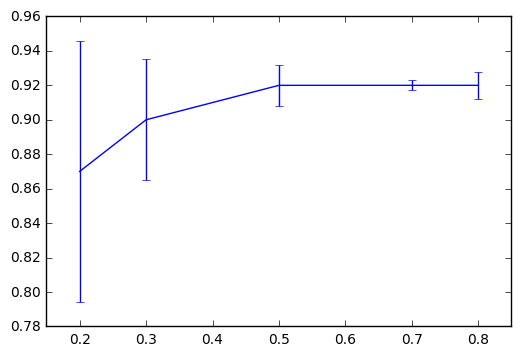

In [66]:
d=[]
for k,v in f1Scores.items():
    d.append((k,np.round(v,2),np.round(f1ScoresV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
plt.xlim(0.15,0.85)

(0.15, 0.85)

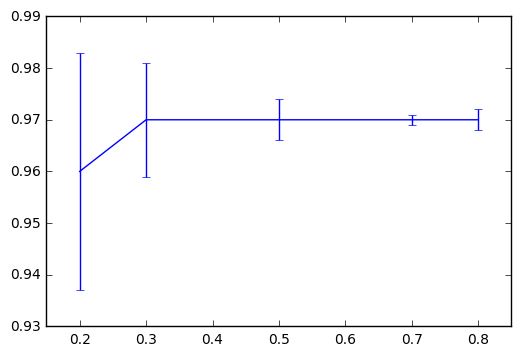

In [67]:
d=[]
for k,v in accuracies.items():
    d.append((k,np.round(v,2),np.round(accuraciesV[k],3)))
d = sorted(d, key=lambda x: x[0])  
d = pd.DataFrame(d,columns = ['ind','m','v'])
plt.errorbar(d['ind'],d['m'],d['v'])
plt.xlim(0.15,0.85)

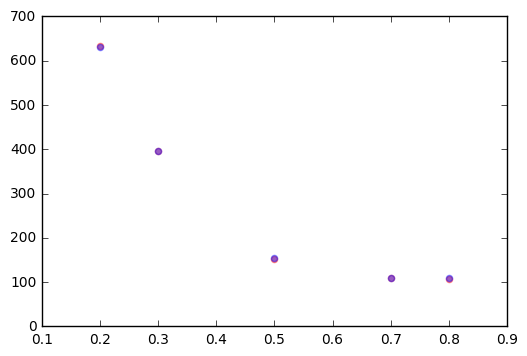

In [68]:
plt.scatter(TTreconstruction.keys(),TTreconstruction.values(),color='red',alpha=0.4)
plt.scatter(TRreconstruction.keys(),TRreconstruction.values(),color='blue',alpha=0.4)

Interesting thing is that even 50% of samples are enough to classify things properly.